# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

import tsensor
from sympy import diff, symbols

from sklearn.preprocessing import StandardScaler

# Data

In [2]:
data = pd.read_csv('data/clean_weather.csv', index_col=0)
data = data.ffill()

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

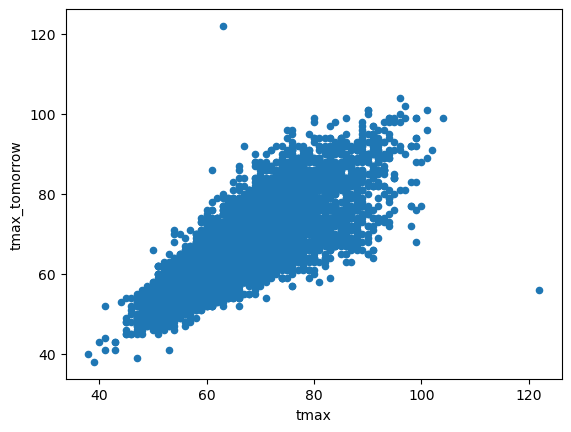

In [3]:
data.plot.scatter('tmax', 'tmax_tomorrow')

In [4]:
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


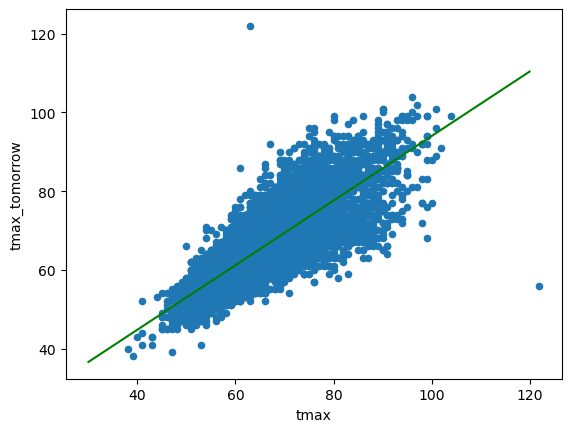

In [6]:
data.plot.scatter('tmax', 'tmax_tomorrow')
predictions = lambda x, w=0.82, b=11.99: w * x + b # coefficients based on linear regression
plt.plot([30, 120], [predictions(30), predictions(120)], 'green')

In [7]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

In [9]:
mse(data['tmax_tomorrow'], predictions(data['tmax']))

22.897335324598416

In [10]:
mse(data['tmax_tomorrow'], predictions(data['tmax'], 0.83)) # with the slightly different weight the error increases

23.474003804870822

In [11]:
mse(data['tmax_tomorrow'], predictions(data['tmax'], 0.82, 13)) # the same for different bias

24.118285439336727

In [ ]:
# We have the best fit parameters for linear regression, but they still don't fit the data perfectly
# There is a non-linear component in the relationship 

In [12]:
tmax_bins = pd.cut(data['tmax'], 25)

In [13]:
tmax_bins

1970-01-01    (58.16, 61.52]
1970-01-02     (51.44, 54.8]
1970-01-03     (51.44, 54.8]
1970-01-04     (51.44, 54.8]
1970-01-05     (51.44, 54.8]
                   ...      
2022-11-22    (61.52, 64.88]
2022-11-23    (64.88, 68.24]
2022-11-24    (64.88, 68.24]
2022-11-25     (68.24, 71.6]
2022-11-26    (61.52, 64.88]
Name: tmax, Length: 13509, dtype: category
Categories (25, interval[float64, right]): [(37.916, 41.36] < (41.36, 44.72] < (44.72, 48.08] < (48.08, 51.44] ... (108.56, 111.92] < (111.92, 115.28] < (115.28, 118.64] < (118.64, 122.0]]

In [15]:
ratios = (data['tmax_tomorrow'] - 11.99) / data['tmax']

In [18]:
# It shows how the relationships between 'tmax' and 'tmax_tomorrow' changes as 'tmax' changes
binned_ratio = ratios.groupby(tmax_bins).mean()

/var/folders/2x/hcfyt7ws2nnbdmgpn5t_gdx00000gn/T/ipykernel_7422/3836670454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(tmax_bins).mean()


In [20]:
binned_tmax = data['tmax'].groupby(tmax_bins).mean()

/var/folders/2x/hcfyt7ws2nnbdmgpn5t_gdx00000gn/T/ipykernel_7422/3113020249.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_tmax = data['tmax'].groupby(tmax_bins).mean()


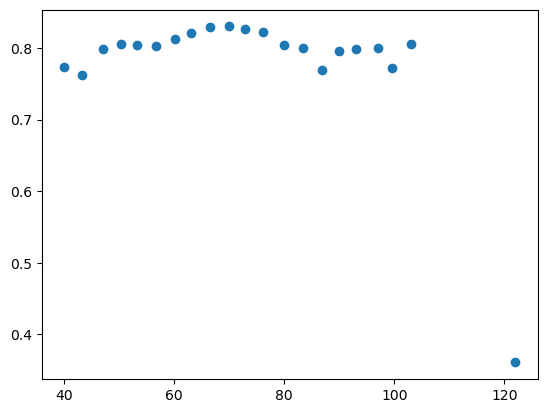

In [21]:
plt.scatter(binned_tmax, binned_ratio)

In [ ]:
# It was an example of non-linear relationship (something tha linear regression can't model)

In [ ]:
# Neural networks do 3 key things
# 1. A non-linear transformation on top of the linear transformation
# 2. Multiple layers, which can capture interactions between features
# 3. Multiple hidden units, which each has a slightly different linear and non-linear transformations

# Activation functions

$y = wx + b$ - linar

$y = relu(wx + b)$ - non-linear

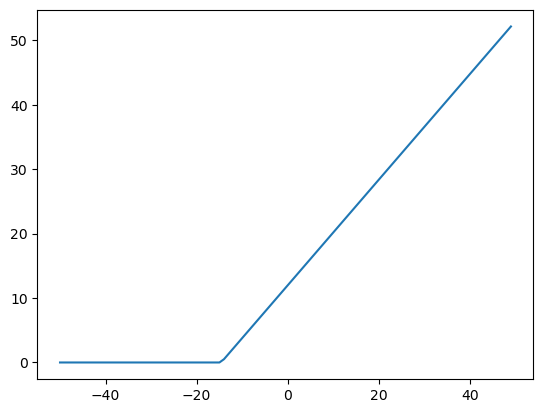

In [22]:
temps = np.arange(-50, 50)
prediction = lambda x, w=0.82, b=11.99: w * x + b
plt.plot(temps, np.maximum(0, prediction(temps)))

# Multiple layers

$\hat{y} = w_{2} relu(w_{1}x + b_{1}) + b_{2}$ - example of  2 layers in neural network

In [23]:
temps = np.arange(-50, 50)

layer1 = np.maximum(0, prediction(temps))

layer2 = prediction(layer1, 0.5, 10) # layer2 will have a different weights and biases, but for now just hardcode it

(0.0, 40.0)

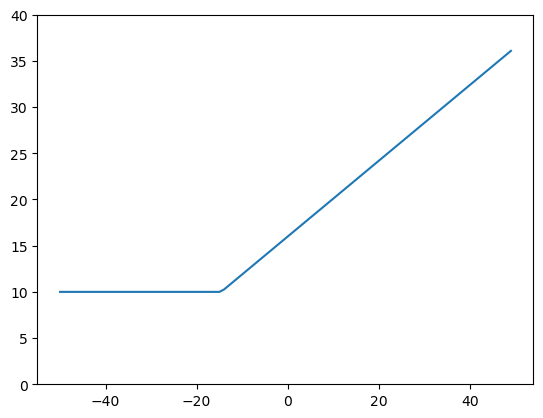

In [25]:
plt.plot(temps, layer2)
plt.ylim((0, 40))

In [ ]:
# it slightly improves the prediction (instead of prediction 0 every time now we predict 10 for negative values)
# the network will be able to learn the correct bias to reduce error 
# (this bias will be different from 10, it's just a simulaition)
# But we still predicting a constant value for any number that output a 0 in layer1
# So the next step will fully solve the problem

# Multiple hidden units

In [26]:
layer1_1 = np.maximum(0, prediction(temps)) # unit 1

layer1_2 = np.maximum(0, prediction(temps, 0.1, 10)) # unit 2 (slightly different weights and biases for simulation)

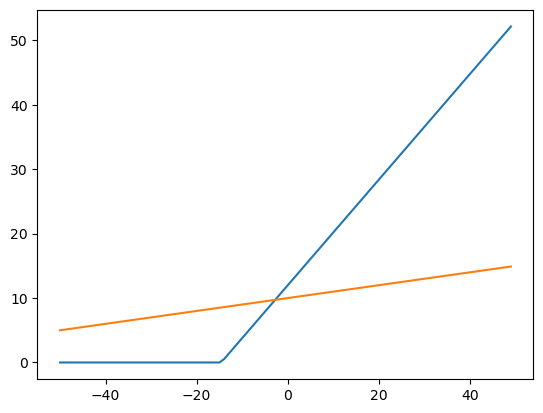

In [27]:
plt.plot(temps, layer1_1)
plt.plot(temps, layer1_2)

In [ ]:
# With one line we truncated all outputs below the certain value to 0
# With the other line we have it (the reason is because we multiply by a very small number 0.1)

In [32]:
layer1_1

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.51,  1.33,  2.15,  2.97,  3.79,  4.61,  5.43,  6.25,  7.07,
        7.89,  8.71,  9.53, 10.35, 11.17, 11.99, 12.81, 13.63, 14.45,
       15.27, 16.09, 16.91, 17.73, 18.55, 19.37, 20.19, 21.01, 21.83,
       22.65, 23.47, 24.29, 25.11, 25.93, 26.75, 27.57, 28.39, 29.21,
       30.03, 30.85, 31.67, 32.49, 33.31, 34.13, 34.95, 35.77, 36.59,
       37.41, 38.23, 39.05, 39.87, 40.69, 41.51, 42.33, 43.15, 43.97,
       44.79, 45.61, 46.43, 47.25, 48.07, 48.89, 49.71, 50.53, 51.35,
       52.17])

In [29]:
layer1_2 # relu function was never activated here

array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
        6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
        8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4,
       10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5,
       11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6,
       12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7,
       13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8,
       14.9])

In [30]:
-50 * 0.1 + 10 # relu wasn't activated

5.0

In [31]:
-50 * 0.82 + 11.99 # relu was activated

-29.009999999999998

In [ ]:
# So weight=0.1 and bias=10 will ensure that this relu function is never activated
# It means that we are passing through all of the information about the input temperature
# But it's only for one unit because the other unit has a bunch of 0 values
# The real power is when we add two units together

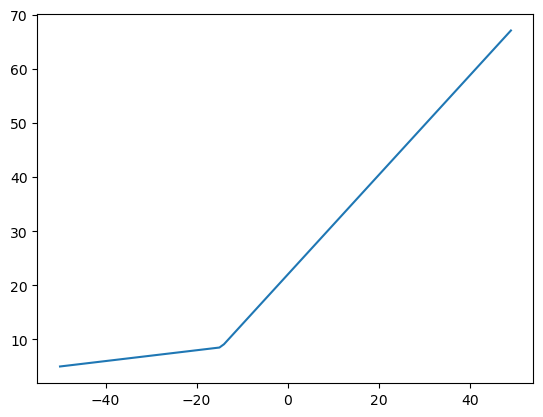

In [34]:
# now we see a non-linear relationship (but we haven't completly lost the input signal)
plt.plot(temps, layer1_1 + layer1_2)

In [ ]:
# If we add more units then we can add a more complex non-linear relationships

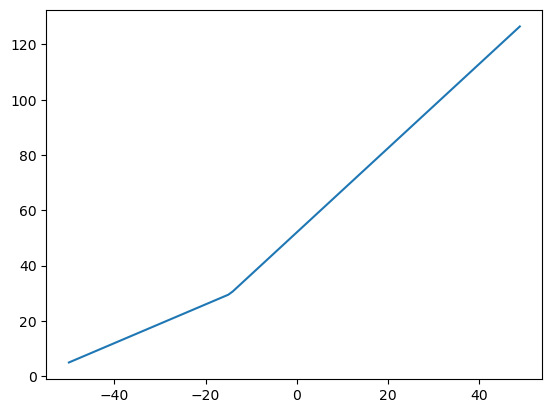

In [37]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, 0.1, 10))

layer1_3 = np.maximum(0, prediction(temps, 0.6, 30))

plt.plot(temps, layer1_1 + layer1_2 + layer1_3)

In [ ]:
# Even more complex relationship

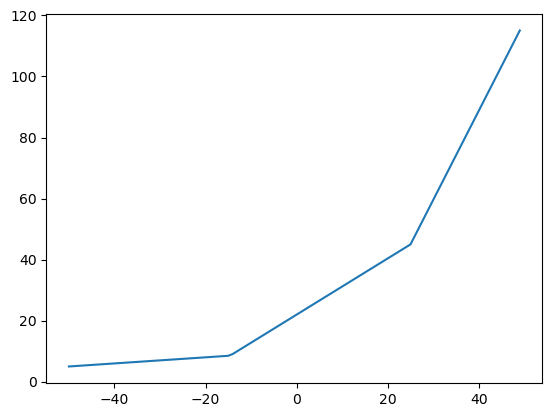

In [38]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, 0.1, 10))

layer1_3 = np.maximum(0, prediction(temps, 2, -50))

plt.plot(temps, layer1_1 + layer1_2 + layer1_3)

In [ ]:
# How it looks for layer2

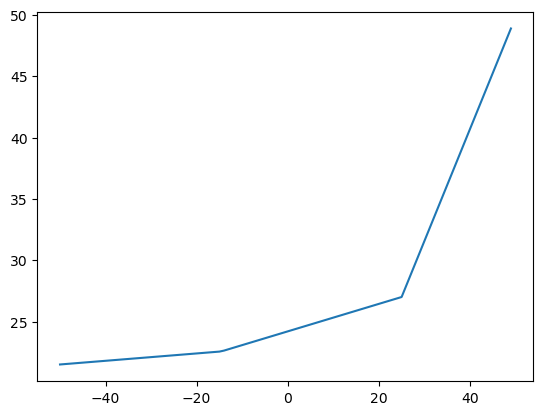

In [39]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, 0.1, 10))

layer1_3 = np.maximum(0, prediction(temps, 2, -50))

# numbers are just for simulation (0.1, 0.3, 0.4 - weights, 20 - bias)
layer2 = layer1_1 * 0.1 + layer1_2 * 0.3 + layer1_3 * 0.4 + 20

plt.plot(temps, layer2)

# Forward pass

In [49]:
input_layer = np.array([[80], [90], [100], [-20], [-10]])

In [50]:
input_layer

array([[ 80],
       [ 90],
       [100],
       [-20],
       [-10]])

In [53]:
l1_weights = np.array([[0.81, 0.1]])

In [56]:
l1_weights

array([[0.81, 0.1 ]])

In [57]:
l1_biases = np.array([[11.99, 10]])

In [58]:
l1_biases

array([[11.99, 10.  ]])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

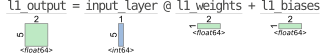

In [60]:
with tsensor.explain():
    l1_output = input_layer @ l1_weights + l1_biases

In [61]:
l1_output

array([[76.79, 18.  ],
       [84.89, 19.  ],
       [92.99, 20.  ],
       [-4.21,  8.  ],
       [ 3.89,  9.  ]])

In [74]:
l1_activated = np.maximum(0, l1_output)

In [75]:
l1_activated

array([[76.79, 18.  ],
       [84.89, 19.  ],
       [92.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.89,  9.  ]])

$layer_{1} = relu(XW_{1} + B_{1})$

$\hat{y} = W_{2}relu(XW_{1} + B_{1}) + B_{2}$

In [ ]:
# The number of rows in W (weights) matrix should be the same as the number of column in X (input) matrix
# The number of columns in W (weights) matrix it is the number of features

In [66]:
l2_weights = np.array([[0.5], [0.2]])

In [67]:
l2_weights

array([[0.5],
       [0.2]])

In [71]:
l2_biases = np.array([[5]])

In [72]:
l2_biases

array([[5]])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

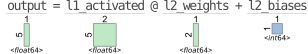

In [78]:
with tsensor.explain():
    output = l1_activated @ l2_weights + l2_biases

In [79]:
output # it is the prediction

array([[46.995],
       [51.245],
       [55.495],
       [ 6.6  ],
       [ 8.745]])

In [ ]:
# If we want more units in the layer, we just add more columns in the weights matrix

In [80]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

In [83]:
tmax

array([[ 80],
       [ 90],
       [100],
       [-20],
       [-10]])

In [82]:
tmax_tomorrow

array([[ 83],
       [ 89],
       [ 95],
       [-22],
       [ -9]])

In [85]:
def mse(actual, predicted):
    return (actual - predicted) ** 2 # without np.mean it will show error for each observation

In [86]:
mse(tmax_tomorrow, output)

array([[1296.360025],
       [1425.440025],
       [1560.645025],
       [ 817.96    ],
       [ 314.885025]])

In [87]:
def mse_grad(actual, predicted):
    return predicted - actual

In [88]:
mse_grad(tmax_tomorrow, output)

array([[-36.005],
       [-37.755],
       [-39.505],
       [ 28.6  ],
       [ 17.745]])

# Backward pass

In [ ]:
# The goal is to calculate the partial derivative of loss with respect to each parameter in the neural network

In [89]:
output_gradient = mse_grad(tmax_tomorrow, output)

In [90]:
output_gradient

array([[-36.005],
       [-37.755],
       [-39.505],
       [ 28.6  ],
       [ 17.745]])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

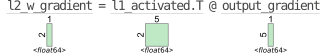

In [92]:
with tsensor.explain():
    l2_w_gradient = l1_activated.T @ output_gradient

In [102]:
l1_activated.T

array([[76.79, 84.89, 92.99,  0.  ,  3.89],
       [18.  , 19.  , 20.  ,  8.  ,  9.  ]])

In [93]:
l2_w_gradient 

array([[-9574.3878],
       [-1767.03  ]])

In [107]:
x, w = symbols('X, W')
sympy_output = x * w
diff(sympy_output, w)

X

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

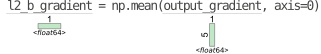

In [108]:
with tsensor.explain():
    l2_b_gradient = np.mean(output_gradient, axis=0)

In [109]:
l2_b_gradient

array([-13.384])

In [110]:
l2_weights

array([[0.5],
       [0.2]])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

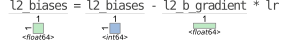

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

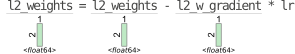

In [119]:
lr = 1e-5

with tsensor.explain():
    l2_biases = l2_biases - l2_b_gradient * lr
    l2_weights = l2_weights - l2_w_gradient * lr

# Layer 1 gradients

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

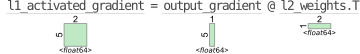

In [120]:
with tsensor.explain():
    l1_activated_gradient = output_gradient @ l2_weights.T

In [121]:
l1_activated_gradient

array([[-24.89701665,  -8.4734383 ],
       [-26.10712023,  -8.88528435],
       [-27.3172238 ,  -9.2971304 ],
       [ 19.77654982,   6.73074116],
       [ 12.27045023,   4.17611895]])

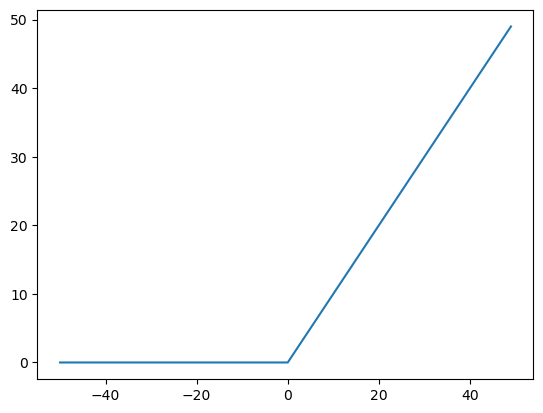

In [122]:
temps = np.arange(-50, 50)

plt.plot(temps, np.maximum(0, temps))

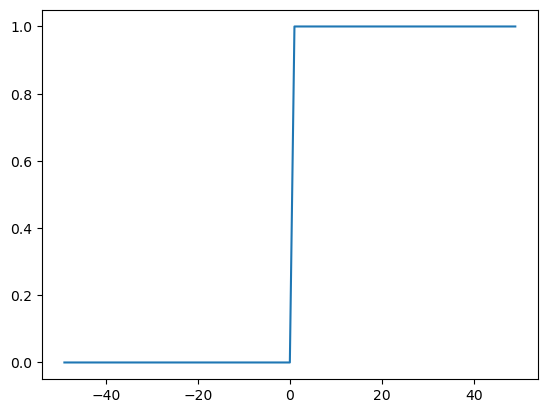

In [123]:
activation = np.maximum(0, temps)

plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

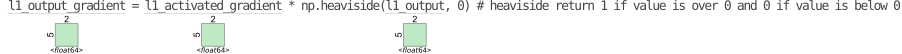

In [124]:
with tsensor.explain():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0) # heaviside return 1 if value is over 0 and 0 if value is below 0

In [125]:
l1_output_gradient

array([[-24.89701665,  -8.4734383 ],
       [-26.10712023,  -8.88528435],
       [-27.3172238 ,  -9.2971304 ],
       [  0.        ,   6.73074116],
       [ 12.27045023,   4.17611895]])

In [126]:
l1_w_gradient = input_layer.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

# Gradient Descent
l1_weights -= l1_w_gradient * lr
l1_biases -= l1_b_gradient * lr

In [127]:
l1_weights

array([[0.88195829, 0.1258364 ]])

In [128]:
l1_biases

array([[11.9901321, 10.0000315]])

# Network training algorithm

1. Run the network forward pass, and get the output:
2. Compute gradient with respect to the outputs of the network. (the `mse_grad` function)
3. For each layer in the network:
   - Compute the gradient with respect to the pre non-linearity output (if the layer has a non-linearity)
   - Compute the gradient with respect to the weights
   - Compute the gradient with respect to the biases
   - Compute the gradient with respect to the inputs to the layer
4. Update the parameters in the network using gradient descent

In [ ]:
# In a lot of implementations of neural network we will use an algorithm slightly different from gradient descent
# The batch size is the number of training examples that we pass at once through the forward pass and backward pass
# The larger the batch size usually the better the network performs the faster it will run, but it can descent less effectively
# This is because we don't get many chances to update the parameters
# So, for too small batch size the network will run slow and the gradient updates can be too influenced by single training examples
# It can pull the gradient back and forth
# But if the batch size is too large, then the network can take a long time to descent

In [131]:
PREDICTORS = ['tmax', 'tmin', 'rain']
TARGET = 'tmax_tomorrow'

scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS]) # we will get the mean of 0 with scaling

split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Full neural network implementation

In [132]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append([
            # the shape of the weights is the number of columns in the previous layer by the number of column in current layer
            np.random.rand(inputs[i-1], inputs[i]) / 5 - 0.1, # weights (scale between -0.1 and 0.1 for better converge)
            np.ones((1, inputs[i])) # the shape of the biases is one by the number of column in current layer
        ])
        
    return layers

In [133]:
# set how many layers we want and how many features in each layer (3 bacause only 3 features as input 'tmax', 'tmin', 'rain')
# the ouptut is a single number (prediction)
layer_config = [3, 10, 10, 1]

layers = init_layers(layer_config)

In [143]:
layers

[[array([[-0.02731534,  0.08108027,  0.02602253,  0.02198534, -0.06864225,
          -0.00654756,  0.06968001, -0.00500396, -0.07641902,  0.08262586],
         [ 0.07494392,  0.07558286, -0.03239938, -0.07927419, -0.07291833,
          -0.0633682 ,  0.05772343,  0.01115492,  0.07129743, -0.03118977],
         [-0.0694032 , -0.00367407,  0.06763754, -0.06004137, -0.01749464,
           0.07587867, -0.03778642,  0.04076471, -0.01844352,  0.09483433]]),
  array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])],
 [array([[-0.07554996,  0.0335642 ,  0.03498103,  0.09562644, -0.05939482,
          -0.06706386, -0.0285742 ,  0.02086516,  0.04982154,  0.04368713],
         [ 0.00199142,  0.01261902, -0.08087155,  0.04839362, -0.02503783,
          -0.06803352, -0.07401386,  0.05324695, -0.01108062, -0.08785803],
         [ 0.04037468,  0.0499466 , -0.00856546, -0.06585975,  0.05710569,
           0.09158459,  0.06225621, -0.00898621,  0.06869529,  0.08766792],
         [ 0.09942564, -0.04228504,  0

In [144]:
# batch - input, what's we are going to feed to the network
# layers - parameters (weights and biases)
def forward(batch, layers):
    hiddens = [batch.copy()] # we are going to store inputs to each layer because we need it in backward pass
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1] # multiply inputs by weights for every layer and add biases
        if i < len(layers) - 1: # if it's not the last output layer
            batch = np.maximum(0, batch)
        hiddens.append(batch.copy())

    # return predictions and hiddens
    return batch, hiddens

In [146]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

def mse_grad(actual, predicted):
    return predicted - actual # don't need to multiply by 2 (it just increases the magnitudes)

In [147]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1): # go from the last layer to the first layer
        if i != len(layers) - 1: # if not the last layer
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0)) # undo relu function (i+1 is the current layer)

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)

        # update parameters
        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr

        grad = grad @ layers[i][0].T # pull the gradient across to the layer below

    return layers

# Training loop

In [148]:
lr = 1e-6
epochs = 10
batch_size = 8
layer_config = [3, 10, 10, 1]

layers = init_layers(layer_config)

for epoch in range(epochs):
    epoch_loss = 0 # average loss across the each epoch

    for i in range(0, train_x.shape[0], batch_size): # batch_size as the step
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]

        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss += np.mean(loss ** 2)

        layers = backward(layers, hidden, loss, lr)

    valid_preds, _ = forward(valid_x, layers) # test the algorithm across validation set (using forward pass, batch will be the whole set)

    print(f'Epoch {epoch} Train MSE: {epoch_loss / (train_x.shape[0] / batch_size)} Valid MSE: {np.mean(mse(valid_preds, valid_y))}')

Epoch 0 Train MSE: 3292.7356332640575 Valid MSE: 1678.4412695510416
Epoch 1 Train MSE: 340.0314165402919 Valid MSE: 26.32200981489958
Epoch 2 Train MSE: 23.347077002681985 Valid MSE: 21.363264950228412
Epoch 3 Train MSE: 22.443923915593537 Valid MSE: 20.87059588352559
Epoch 4 Train MSE: 22.185302900372623 Valid MSE: 20.774709086935562
Epoch 5 Train MSE: 22.11844705143445 Valid MSE: 20.761019443831447
Epoch 6 Train MSE: 22.099819435624454 Valid MSE: 20.76225218295131
Epoch 7 Train MSE: 22.09331580531982 Valid MSE: 20.764896906512636
Epoch 8 Train MSE: 22.090080437024355 Valid MSE: 20.76698081246971
Epoch 9 Train MSE: 22.08788111832833 Valid MSE: 20.76843612413715


In [ ]:
# When Valid MSE start increasing it means the algorithm starts overfitting

In [149]:
layers[0]

[array([[ 0.17653995,  0.21755543,  0.10233914,  0.15198566,  0.02160541,
          0.16144108,  0.1006233 ,  0.0076539 ,  0.11085538,  0.13675685],
        [-0.04051773,  0.06647878, -0.0229598 ,  0.05924768,  0.0741081 ,
         -0.02034729,  0.03838452,  0.06906195, -0.06982022,  0.10853526],
        [-0.10758659, -0.02448953,  0.05396736, -0.13138194,  0.02429677,
          0.01075917,  0.0425725 ,  0.05664139,  0.01773939, -0.03906775]]),
 array([[1.07210184, 1.07806514, 1.07390241, 1.07616754, 1.06275214,
         1.09223804, 1.06813229, 1.06445378, 1.06673637, 1.07627894]])]

In [150]:
pred, _ = forward(test_x, layers)
np.mean(mse(pred, test_y))

22.08271487403482